## Install and Import Dependencies

In [1]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.4.0, 1.5.0, 1.5.1, 1.6.0, 1.7.0, 1.7.1, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.10.0, 1.10.1, 1.10.2, 1.11.0, 1.12.0, 1.12.1)
ERROR: No matching distribution found for torch==1.8.1+cu111


In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12880, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 12880 (delta 20), reused 24 (delta 13), pack-reused 12844
Receiving objects: 100% (12880/12880), 13.07 MiB | 6.69 MiB/s, done.
Resolving deltas: 100% (8850/8850), done.


In [9]:
!cd yolov5 & pip install -r requirements.txt 

  Using cached Pillow-9.2.0-cp38-cp38-macosx_10_10_x86_64.whl (3.1 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageai 2.1.6 requires keras==2.4.3, but you have keras 2.7.0 which is incompatible.
imageai 2.1.6 requires pillow==7.0.0, but you have pillow 9.2.0 which is incompatible.


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/thekunhome/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-9-27 Python-3.8.12 torch-1.12.1 CPU

Fusing layers... 
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Make Detections with Images

In [11]:
img = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'

In [12]:
results = model(img)
results.print()

image 1/1: 533x800 2 persons, 28 cars, 5 trucks
Speed: 21.5ms pre-process, 362.7ms inference, 12.8ms NMS per image at shape (1, 3, 448, 640)


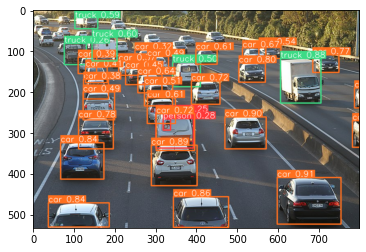

In [13]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [14]:
results.render()

[array([[[251, 216, 174],
         [254, 220, 175],
         [246, 213, 168],
         ...,
         [127, 149, 146],
         [ 67,  79,  55],
         [ 64,  70,  34]],
 
        [[235, 201, 156],
         [233, 200, 155],
         [221, 189, 142],
         ...,
         [120, 142, 140],
         [ 82,  92,  67],
         [ 46,  52,  16]],
 
        [[252, 220, 171],
         [245, 213, 164],
         [212, 180, 131],
         ...,
         [135, 155, 154],
         [ 66,  74,  50],
         [ 58,  62,  25]],
 
        ...,
 
        [[ 61,  69,  80],
         [ 64,  72,  83],
         [ 61,  69,  80],
         ...,
         [ 47,  52,  56],
         [ 48,  53,  57],
         [ 49,  54,  58]],
 
        [[ 56,  64,  75],
         [ 72,  80,  91],
         [ 70,  78,  89],
         ...,
         [ 48,  53,  57],
         [ 48,  53,  57],
         [ 50,  55,  59]],
 
        [[ 64,  72,  83],
         [ 76,  84,  95],
         [ 63,  71,  82],
         ...,
         [ 49,  54,  58],
  

## Real Time Detections

In [20]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 

## Train from scratch

In [7]:
import uuid   # Unique identifier
import os
import time

In [8]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['happy','sad','angry']
number_imgs = 10

In [15]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [16]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/happy.3f47a71e-3fd0-11ed-98e6-b287b6916934.jpg


In [17]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data/images/happy.438fbc94-3fd0-11ed-98e6-b287b6916934.jpg
data/images/happy.438fbe9c-3fd0-11ed-98e6-b287b6916934.jpg
data/images/happy.438fbff0-3fd0-11ed-98e6-b287b6916934.jpg
data/images/happy.438fc0f4-3fd0-11ed-98e6-b287b6916934.jpg
data/images/happy.438fc202-3fd0-11ed-98e6-b287b6916934.jpg
data/images/happy.438fc2f2-3fd0-11ed-98e6-b287b6916934.jpg
data/images/happy.438fc432-3fd0-11ed-98e6-b287b6916934.jpg
data/images/happy.438fc518-3fd0-11ed-98e6-b287b6916934.jpg
data/images/happy.438fc9fa-3fd0-11ed-98e6-b287b6916934.jpg
data/images/happy.438fcbee-3fd0-11ed-98e6-b287b6916934.jpg
data/images/sad.438fcf72-3fd0-11ed-98e6-b287b6916934.jpg
data/images/sad.438fd1ac-3fd0-11ed-98e6-b287b6916934.jpg
data/images/sad.438fd300-3fd0-11ed-98e6-b287b6916934.jpg
data/images/sad.438fd90e-3fd0-11ed-98e6-b287b6916934.jpg
data/images/sad.438fda58-3fd0-11ed-98e6-b287b6916934.jpg
data/images/sad.438fdbfc-3fd0-11ed-98e6-b287b6916934.jpg
data/images/sad.438fdd50-3fd0-11ed-98e6-b287b6916934.jpg
data/images

In [20]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 3 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 4.04 MiB/s, done.
Resolving deltas: 100% (1242/1242), done.


In [21]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [25]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 18 (delta 8), reused 15 (delta 7), pack-reused 0
Unpacking objects: 100% (18/18), 19.16 KiB | 1.20 MiB/s, done.
From https://github.com/ultralytics/yolov5
   2373d54..799e3d0  master     -> origin/master
   c8a8be3..3134699  exp8       -> origin/exp8
github: ⚠️ YO

## Load Custom Model

In [29]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/thekunhome/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-9-29 Python-3.8.12 torch-1.12.1 CPU



Exception: Ran out of input. Cache may be out of date, try `force_reload=True` or see https://github.com/ultralytics/yolov5/issues/36 for help.

In [34]:
img = os.path.join('data', 'images', 'angry.2b1a5c96-3fd0-11ed-98e6-b287b6916934')

In [35]:
results = model(img)

FileNotFoundError: [Errno 2] No such file or directory: 'data/images/angry.2b1a5c96-3fd0-11ed-98e6-b287b6916934'

In [ ]:
results.print()

In [ ]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()